# **Yolo v5 clone**

In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
%cd yolov5

/content/yolov5


# **필수 library 설치**

In [ ]:
!pip install -r requirements.txt

# **Set up**

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

import cv2
import numpy as np
import os
import random
import time

from collections import defaultdict

from IPython.display import display
from PIL import Image

from google.colab import files

In [5]:
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# **Yolo v5 모델 불러오기**

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-27 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


# **Image 불러오기**

In [27]:
# 로컬에서 이미지 파일 업로드
uploaded = files.upload()

# 업로드한 파일 이름 가져오기
image_path = list(uploaded.keys())[0]
print(f"업로드된 이미지 경로: {image_path}")

Saving 스크린샷 2024-05-11 185338.png to 스크린샷 2024-05-11 185338.png
업로드된 이미지 경로: 스크린샷 2024-05-11 185338.png


In [28]:
# 이미지 파일 읽기
image = cv2.imread(image_path)
if image is None:
    raise Exception("Error: 이미지를 불러올 수 없습니다.")

# **이미지 전처리**

In [29]:
# 이미지 크기 조정
image_resized = cv2.resize(image, (640, 640))  # YOLO에 적합한 크기

In [30]:
# YOLOv5 모델로 객체 탐지 수행
results = model(image_resized)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [31]:
# 탐지된 결과를 numpy 배열로 변환
detections = results.xyxy[0].cpu().numpy()

# **Main**

탐지된 객체 수: 15


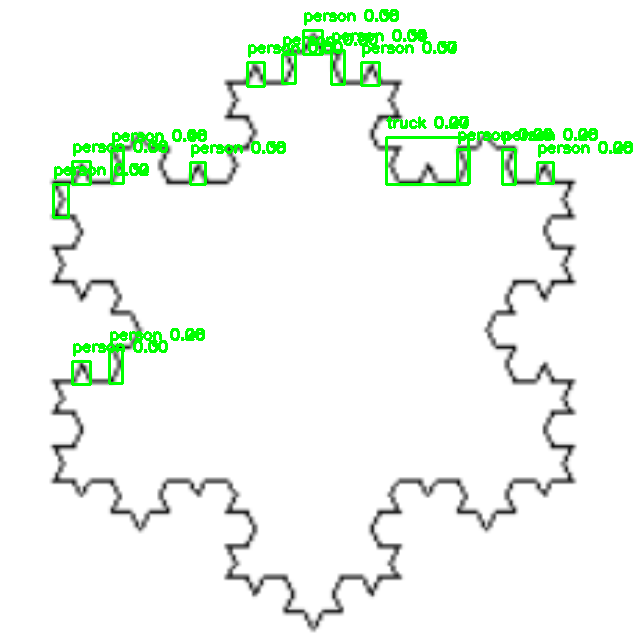

In [41]:
# 탐지된 객체가 있는지 확인
if len(detections) == 0:
    print("탐지된 객체가 없습니다.")
else:
    print(f"탐지된 객체 수: {len(detections)}")

    # 탐지된 객체에 대해 경계 상자 및 레이블 표시
    for detection in detections:
        x1, y1, x2, y2, conf, cls = detection[:6]
        label = f"{model.names[int(cls)]} {conf:.2f}"

        # 경계 상자 그리기
        cv2.rectangle(
            image_resized, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2
        )

        # 레이블 표시
        cv2.putText(
            image_resized, label, (int(x1), int(y1) - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2
        )

    # BGR에서 RGB로 변환 (Matplotlib에서 올바르게 표시하기 위해)
    image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)

    image_pil = Image.fromarray(image_rgb)
    display(image_pil)